In [4]:
import pandas as pd
from marked_words import marked_words
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.patches import Patch

def pprint(dic):
    for word in sorted(dic,key=lambda x: x[1],reverse=True):
        print("%s, %.2f" % (word[0],word[1]))

In [5]:
CB = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

file = open("data/stereo_dict.pkl", 'rb')
e_s_d = pickle.load(file)

In [8]:

df_dv2 = pd.read_csv('data/dv2/dv2_main_generations.csv')
df_dv3 = pd.read_csv('data/dv3/dv3_main_generations.csv')
df_gpt35 = pd.read_csv('data/chatgpt/chatgpt_main_generations.csv')
df_gpt4 = pd.read_csv('data/chatgpt/chatgpt_main_generations.csv')
df_gpt4o = pd.read_csv('data/gpt-4o/gpt4o_all_personas.csv')
df_llama3 = pd.read_csv('data/llama3/generated_personas_llama3.csv')
df_mixtral = pd.read_csv('data/mixtral/generated_personas_mixtral.csv')

df_gpt35 = df_gpt35[df_gpt35['model'] == 'chatgpt']
df_gpt4 = df_gpt4[df_gpt4['model'] == 'gpt4']


dfs = [df_dv2, df_dv3, df_gpt35, df_gpt4, df_gpt4o, df_llama3, df_mixtral]
model_names = ['DV2', 'DV3', 'GPT3.5', 'GPT4', 'GPT4o', 'Llama3', 'Mixtral']

In [10]:
def add_stereotype_counts(df, stereotype_dict):
    df['text_clean'] = df['text'].str.lower().str.replace('[^\w\s]', '', regex=True)
    df['text_clean'] = df['text_clean'].fillna('') 
    for ethnic, stereolist in stereotype_dict['person'].items():
        counts = []
        for _, row in df.iterrows():
            count = 0
            for word in stereolist:
                count += row['text_clean'].count(word)
            count /= len(row['text_clean'].split(' ')) if len(row['text_clean'].split(' ')) > 0 else 1
            counts.append(count)
        df[ethnic] = counts
    return df

dfs = [add_stereotype_counts(df, e_s_d) for df in dfs]

/var/folders/1h/22724y8j5x9blcpgsx2p4rvc0000gn/T/ipykernel_53845/2809261489.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()])


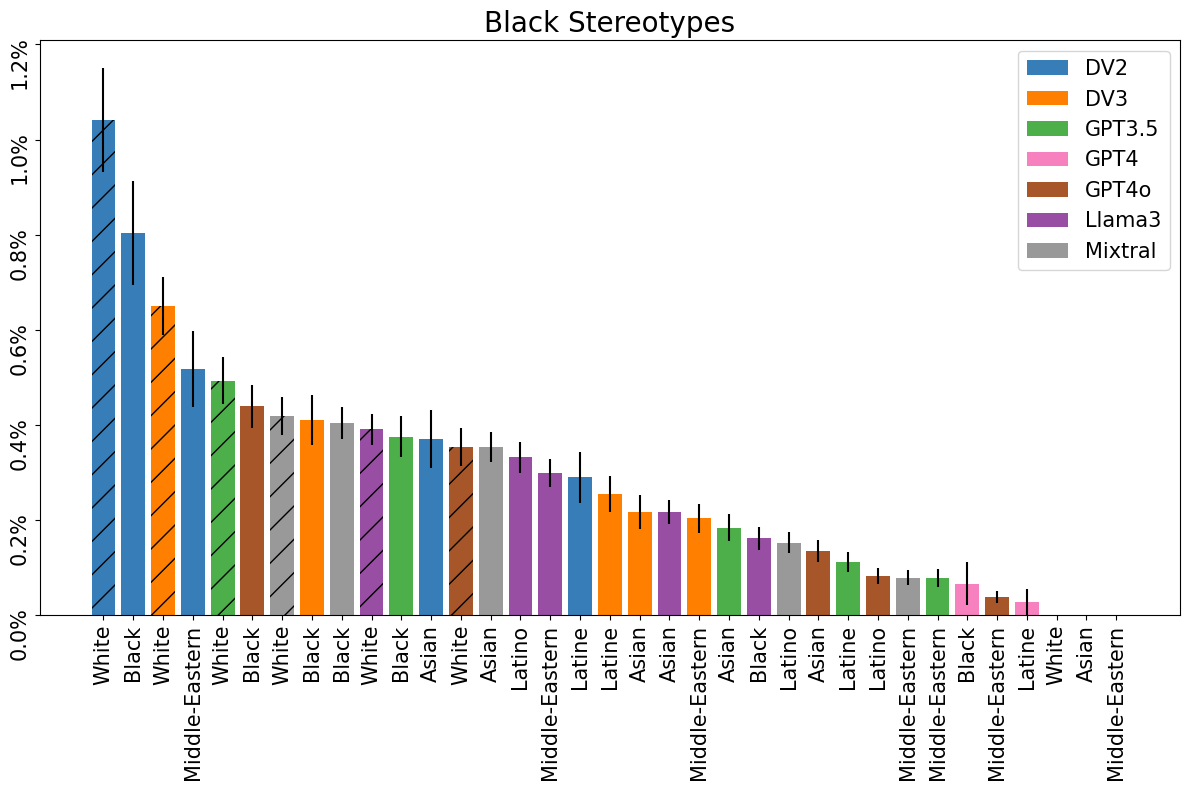

/var/folders/1h/22724y8j5x9blcpgsx2p4rvc0000gn/T/ipykernel_53845/2809261489.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()])


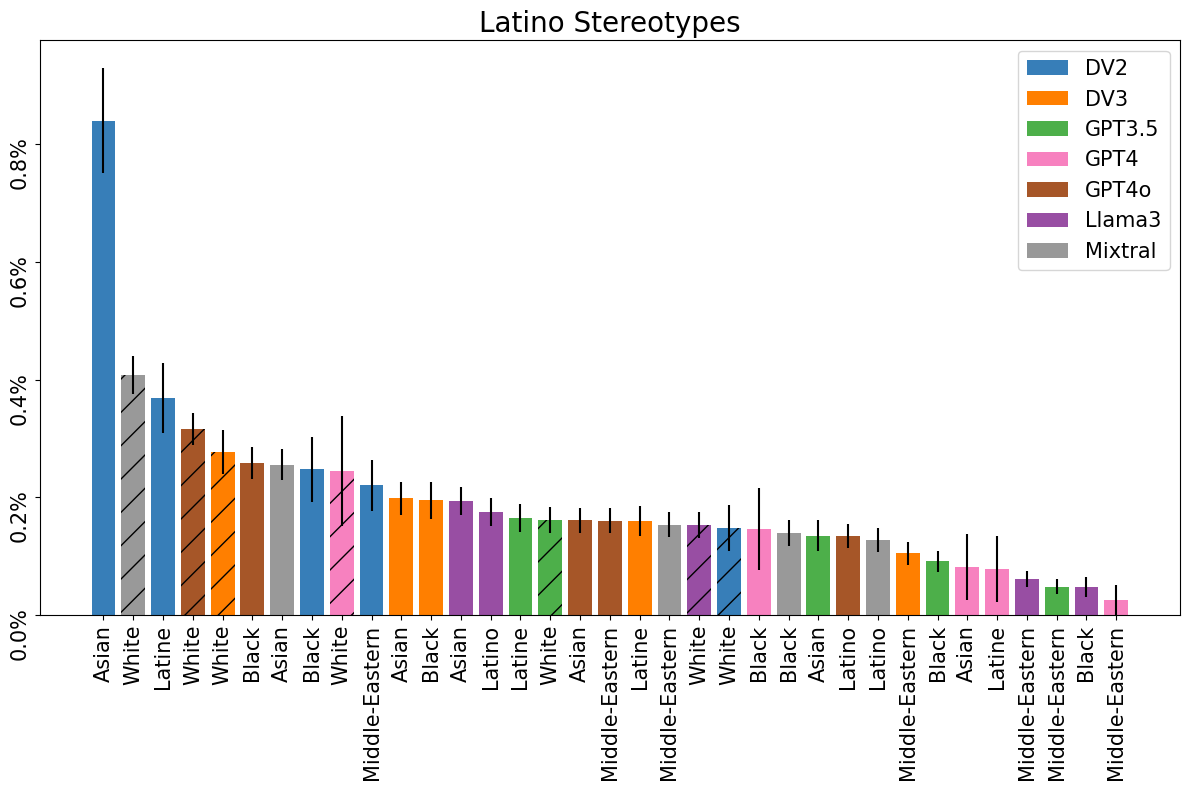

/var/folders/1h/22724y8j5x9blcpgsx2p4rvc0000gn/T/ipykernel_53845/2809261489.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()])


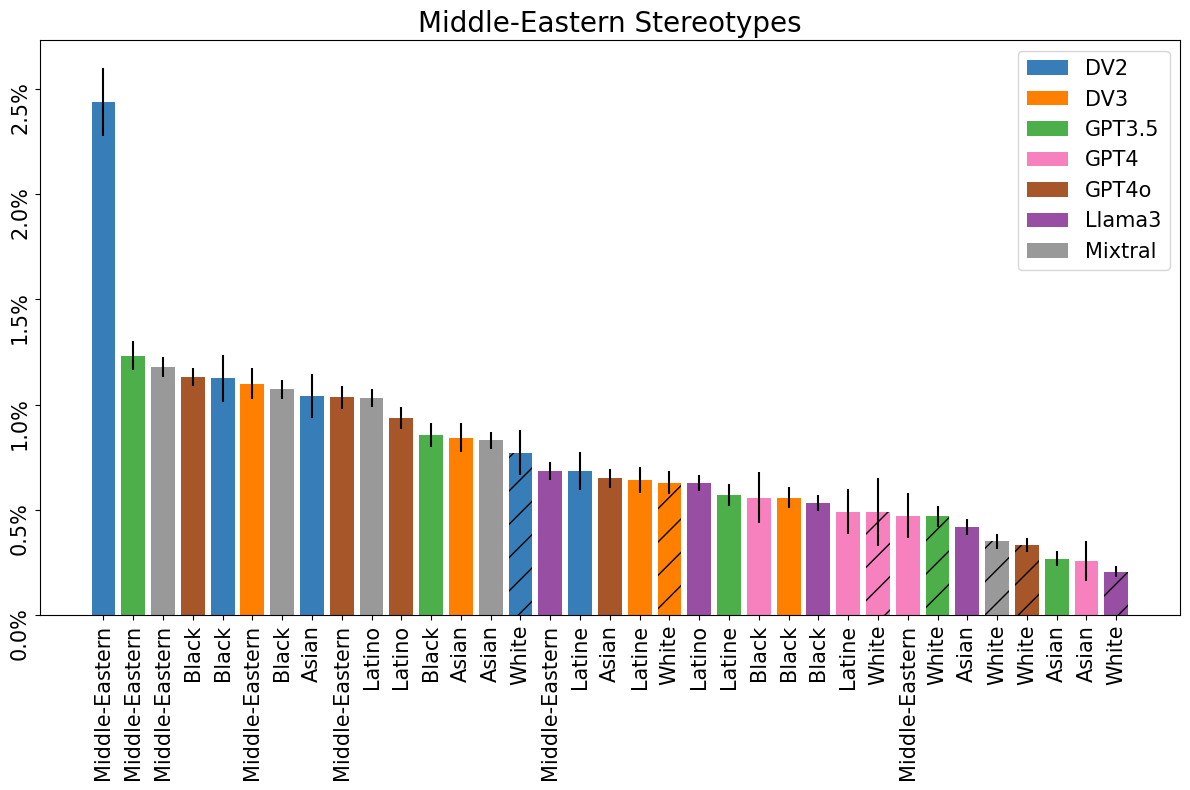

/var/folders/1h/22724y8j5x9blcpgsx2p4rvc0000gn/T/ipykernel_53845/2809261489.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()])


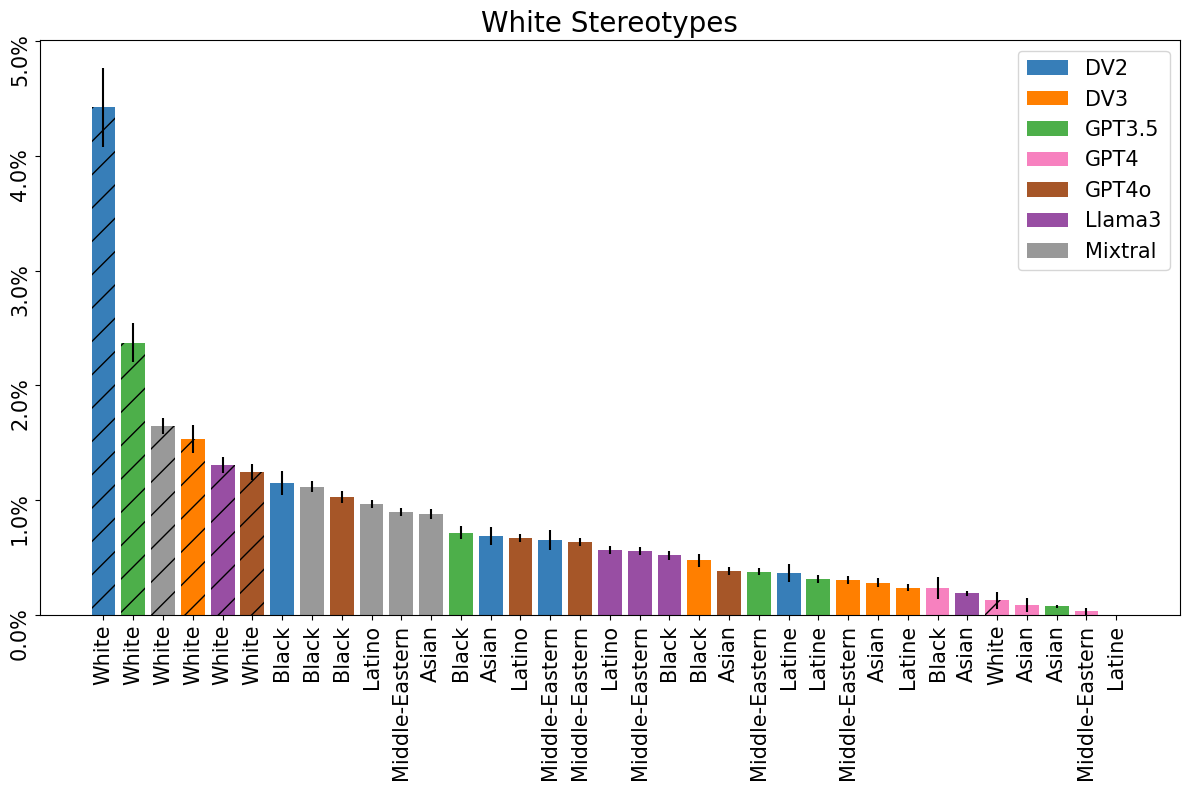

/var/folders/1h/22724y8j5x9blcpgsx2p4rvc0000gn/T/ipykernel_53845/2809261489.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()])


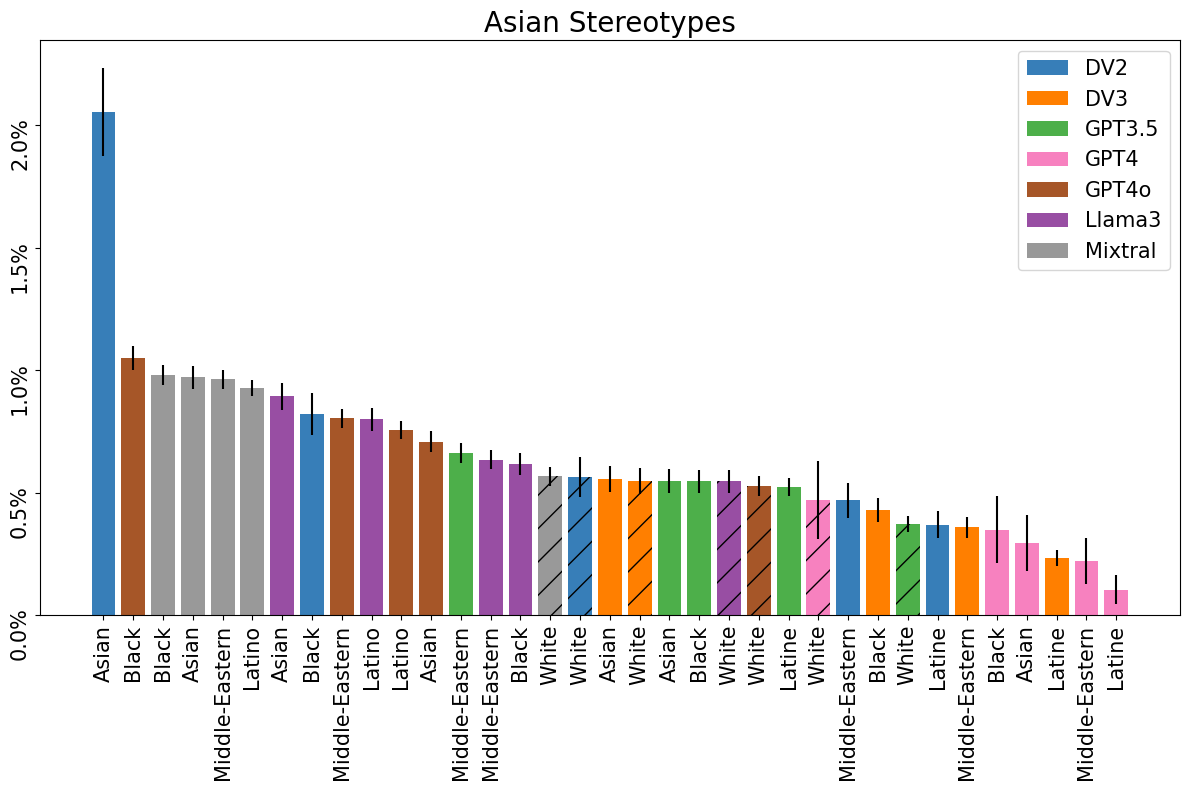

In [11]:
# This bar plot compares the bias scores of different language models. 
# Each bar represents a specific language model, and its height indicates the bias score. 
# The color coding helps differentiate the models visually.

def plot_stereotypes(dfs, model_names, stereotype_dict):
    CB = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
    plt.rcParams["figure.figsize"] = (12, 8)
    fontsizeval = 20

    for ethnic, stereolist in stereotype_dict['person'].items():
        fig, ax = plt.subplots()
        reverse_count = {model: {} for model in model_names}
        
        for df, model in zip(dfs, model_names):
            for race in df['race'].unique():
                mean_val = np.mean(df.loc[df['race'] == race][ethnic])
                std_val = np.std(df.loc[df['race'] == race][ethnic]) / np.sqrt(np.size(df.loc[df['race'] == race][ethnic]))
                race_key = race.split(' ')[1] if len(race.split(' ')) > 1 else race  # Handle cases where race doesn't have a second element
                reverse_count[model][race_key] = [mean_val, std_val]
        
        names = []
        values = []
        colors = []
        patterns = []
        
        for model in model_names:
            for race, stats in reverse_count[model].items():
                names.append(race)
                values.append(stats)
                colors.append(CB[model_names.index(model)])
                patterns.append('/' if race == 'White' else '')

        sorted_items = sorted(zip(names, values, model_names * len(df['race'].unique()), colors, patterns), key=lambda p: p[1][0], reverse=True)
        names, values, models, colors, patterns = zip(*sorted_items)
        
        plt.bar(range(len(values)), [v[0] for v in values], yerr=[v[1] for v in values], tick_label=names, color=colors, hatch=patterns)
        plt.title(f'{ethnic} Stereotypes', fontsize=fontsizeval)
        legend_elements = [Patch(facecolor=CB[i], label=model_names[i]) for i in range(len(model_names))]
        plt.legend(handles=legend_elements, fontsize=fontsizeval - 5)
        plt.xticks(rotation=90, fontsize=fontsizeval - 5)
        plt.yticks(fontsize=fontsizeval - 5, rotation=90)
        plt.gca().set_yticklabels([f'{x:.1%}' for x in plt.gca().get_yticks()])
        plt.tight_layout()
        plt.savefig(f"figures/{ethnic}_st.pdf", format="pdf", bbox_inches="tight")
        plt.show()

# Plot stereotypes
plot_stereotypes(dfs, model_names, e_s_d)
